## Importing Libraires

In [16]:
import numpy as np
import math
from random import choice
import random
import matplotlib as plt

## Setting Variables

In [17]:
Source = 13
Target = 14
total_state = 256 
size = total_state
sub_size = int(size**(1/2))
gamma = .4
learning_rate=0.5
max_epochs = 3000

Wall=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 16, 31, 32, 47, 48, 50, 51, 52, 55, 56, 57, 63, 64, 66, 67, 68, 71, 72, 73, 79, 80, 82, 83, 84, 87, 88, 89, 95, 96, 111, 112, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 175,176, 177, 178, 191, 192, 193, 194, 198, 199, 200, 207, 208, 209, 210, 214, 215, 216, 223, 224, 225, 226, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255]


## Defining Functions

In [21]:
def valid_adj_cell(rcell, ccell, M, A):
    adj_cell = [(0,1),(0,-1),(1,0),(-1,0)]
    valid_cell=[]
    row_len = len(M)-1
    col_len = len(M[0])-1
    
    if ccell== 0:
        adj_cell = [(0,1),(1,0),(-1,0)]
    if ccell == col_len:
        adj_cell =[(0,-1),(1,0),(-1,0)]
    if rcell == 0:
        adj_cell = [(0,1),(0,-1),(1,0)]
    if rcell == row_len:
        adj_cell = [(0,1),(0,-1),(-1,0)]
    if ccell == 0 and rcell == 0:
        adj_cell =[(0,1),(1,0)]
    if ccell == 0 and rcell == row_len:
        adj_cell =[(0,1),(-1,0)]
    if ccell == col_len and rcell == 0:
        adj_cell =[(0,-1),(1,0)]
    if ccell == col_len and rcell == row_len:
        adj_cell =[(0,-1),(-1,0)]    
    
    for cell_pos in adj_cell:            
        new_state =A[rcell + cell_pos[0]][ccell + cell_pos[1]]
        valid_cell.append(new_state)
    return valid_cell

def valid_adj_actions(rcell, ccell, M, A):
    adj_cell = [(0,1),(0,-1),(1,0),(-1,0)]
    adj_action=[0, 1, 2, 3]
    row_len = len(M)-1
    col_len = len(M[0])-1
    
    if ccell== 0:
        adj_action = [0,2,3]
    if ccell == col_len:
        adj_action =[1,2,3]
    if rcell == 0:
        adj_action = [0,1,2]
    if rcell == row_len:
        adj_action = [0, 1, 3]
    if ccell == 0 and rcell == 0:
        adj_action =[0,2]
    if ccell == 0 and rcell == row_len:
        adj_action =[0,3]
    if ccell == col_len and rcell == 0:
        adj_action =[1,2]
    if ccell == col_len and rcell == row_len:
        adj_action =[1,3]    
        

    return adj_action

def next_available_states(st, Array_1, total_state):
  state_array = []
  for i in range(total_state):
    if Array_1[st,i] == 1: 
      state_array.append(i)
  return state_array

def next_available_actions(st, Array_1, total_state):
  actions_array = []
  for i in range(3):
    if Array_1[st,i] == 1: 
      actions_array.append(i)
  return actions_array

def random_next_state(st, Array_1, total_state):

  avail_state_array = next_available_states(st, Array_1, total_state)
  length_avail_state_array = len(avail_state_array)
  rand_next_state = avail_state_array[np.random.randint(0, length_avail_state_array)]
  return rand_next_state 

def random_next_action(st, Array_1, total_state):
  avail_action_array = next_available_actions(st, Array_1, total_state)
  length_avail_action_array = len(avail_action_array)
  rand_next_action = avail_action_array[np.random.randint(0, length_avail_action_array)]
  return rand_next_action 

def next_high_reward_state(st, Array_2, total_state, visited_list, Maze):
  avail_state_array = next_available_states(st, Array_2, total_state)
  avail_act_array = next_available_actions(st, Array_1, total_state)
  #print(avail_state_array)
  reward_list=[]
  for i in avail_state_array:
      reward = get_reward(i, visited_list, Wall)
      reward_list.append(reward)
      
  max_list=[i for i, x in enumerate(reward_list) if x == max(reward_list)]
  n= random.choice(max_list)  
  return avail_state_array[n]

def next_high_reward_action(st, Array_1, Array_2, total_state, visited_list):
  avail_state_array = next_available_states(st, Array_2, total_state)  
  avail_act_array = next_available_actions(st, Array_1, total_state)
  #print(avail_act_array)
  reward_list=[]
  for i in avail_state_array:
      reward = get_reward(i, visited_list, Wall)
      reward_list.append(reward)
      
  max_i= avail_state_array[0] 
  maxIndex =0  
  for i in range(len(reward_list)):
    if reward_list[i] > max_i:
        max_i = reward_list[i]
        maxIndex = i
  return avail_act_array[maxIndex]  

def get_reward(st, visited_list, Wall):
  if st == Target:
      Reward = 100
  elif st == Source:
      Reward = 10    
  elif st in visited_list:
      Reward = -10 
  elif st in Wall:
      Reward = -9999
  else:
      Reward = 100
  return Reward

def Algo_q_learing(Array_2, Array_1, Q_matrix, gamma, learning_rate, Target, total_state, max_epochs, Wall, A):
  path_array=[]
  reward_array=[]
  for i in range(0,max_epochs):
    #print("Epos")    

    visited_list=[]
    reward_list=[]
    #present_state = choice([i for i in range(0,total_state) if i not in Wall])
    present_state=13

    check_presest_state= present_state not in Wall
    if check_presest_state == True:

      while(True):
        #print("present")
        #if present_state not in visited_list:
          
        visited_list.append(present_state)  
        
        #next_state = random_next_state(present_state, Maze1, total_state)
        next_state= next_high_reward_state(present_state, Array_2, total_state, visited_list, Array_1)
        action = random_next_action(present_state, Array_1, total_state)
        #action = next_high_reward_action(present_state, Maze, Maze1, total_state, visited_list)
        
        #next_state= next_high_reward_state(present_state, Maze, total_state, visited_list)
        #print("next")
        #print(next_state)
        available_next_state_array = next_available_states(next_state, Array_2, total_state)
        available_next_actions_array = next_available_actions(present_state, Array_1, total_state)
    
        maxQ = -9999.99
        for j in range(len(available_next_actions_array)):
          get_ac = available_next_actions_array[j]
          q = Q_matrix[next_state,get_ac]
          if q > maxQ:
            maxQ = q
        Reward_val = get_reward(next_state, visited_list, Wall)
        reward_list.append(Reward_val)
        Q_matrix[present_state][action] = Q_matrix[present_state][action]+ learning_rate*(Reward_val + (gamma * maxQ)-Q_matrix[present_state][action])
        #Q_matrix[present_state][action] = Reward_val + (gamma * maxQ)
    
  
        present_state = next_state
        if next_state == Target:
          visited_list.append(next_state)   
          #print(visited_list)
          #print(sum(reward_list))  
          reward_array.append(sum(reward_list))
          path_array.append(visited_list)  
          break 
    else:
     i+=1
  #print(reward_array)   
  max_k= reward_array[0] 
  maxIndex =0  
  for i in range(len(reward_array)):
    if reward_array[i] > max_k:
        max_k = reward_array[i]
        maxIndex = i
    
  return (path_array[maxIndex])


def Stored_path(Source, Target, Q_matrix):
  path_array =[]
  present_state = Source
  path_array.append(present_state)
  #print(str(present_state) + "+", end="")
  #print(Q_matrix)
  while present_state != Target:
    next = np.argmax(Q_matrix[present_state])
    #print(str(next) + "+", end="")
    #print(next)
    present_state = next
    path_array.append(present_state)
  return path_array


def copy_solved_maze(path, M, A, sub_size):
  ans =np.zeros(shape=[sub_size, sub_size], dtype=np.int)
  for i in range(len(M)):
    for j in range(len(M[i])):
      cnode= M[i][j]
      cstate=A[i][j]
      check_cstate= cstate in path
      if check_cstate == True:
        ans[i][j] = 5
      else:
        ans[i][j] = M[i][j]
    
  return ans  


def Show_solved_maze(path, M, A):
  for i in range(len(M)):
    for j in range(len(M[i])):
      cnode= M[i][j]
      cstate=A[i][j]
      check_cstate= cstate in path
      if check_cstate == True:
        print("P", end=' ')
      else:
        print(cnode, end=' ')
    print ("\n")
    
def get_layout():
    arr = ""
    for i in range(size):
        arr = arr + ('-99' if i in Wall else "0") + (";" if (i+1)%sub_size == 0 and i!=0 else "") + " "
    arr = arr[:-2]
    M= np.array(np.mat(arr))
    return M

def get_layout_with_state_position():
    mat = ""
    for i in range(size):
        mat = mat + str(i) + (";" if (i+1)%sub_size == 0 and i!=0 else "") + " "
    mat = mat[:-2]
    A= np.array(np.mat(mat))
    return A 

def get_arr_table_state_action():
    #the maze, 0 means wall, 1 means the path
    M= get_layout()
    #print(M)
    #defining the maze grid with state positions
    A= get_layout_with_state_position()
    Arr = np.zeros(shape=[size, 4], dtype=np.int)
    for i in range(len(M)):
        for j in range(len(M[i])):
            valid_st= valid_adj_cell(i, j, M, A)
            valid_act = valid_adj_actions(i, j, M, A)
            #print(valid_state)
            p_st = A[i][j]
            if p_st not in Wall:
                for n in range(len(valid_st)):
                    k=valid_st[n]
                    m=valid_act[n]
                    p_st = A[i][j]
                    #m = valid_act[k]
                    if k not in Wall:
                        Arr[p_st, m] = 1
                        #print(Maze[p_st, k])

    Arr[Target, 3] = 1;
    return Arr

def get_arr_table_state_state():
    #the maze, 0 means wall, 1 means the path
    M= get_layout()
    #print(M)
    #defining the maze grid with state positions
    A= get_layout_with_state_position()
    Arr = np.zeros(shape=[size, size], dtype=np.int)
    for i in range(len(M)):
        for j in range(len(M[i])):
            valid_state= valid_adj_cell(i, j, M, A)

            #print(valid_state)
            for k in valid_state:
                check_k = k not in Wall
                if check_k == True:
                    p_st = A[i][j]
                    Arr[p_st, k] = 1
                    #print(Maze[p_st, k])
                else:
                    k+=1

    Arr[Target, Target] = 1;
    return Arr

## Main Program

In [22]:
A=get_layout_with_state_position()
Array_1=get_arr_table_state_action()
Array_2=get_arr_table_state_state()
Q_matrix = np.zeros(shape=[size, size], dtype=np.float32)  

path_array = Algo_q_learing(Array_2, Array_1, Q_matrix, gamma, learning_rate, Target, total_state, max_epochs, Wall, A) 

print("Chosen Path for the agent")
print(path_array)  

print("Total Number of steps")
print(len(path_array))


Chosen Path for the agent
[13, 29, 28, 44, 43, 27, 26, 25, 24, 23, 22, 38, 37, 21, 20, 19, 18, 17, 33, 49, 65, 81, 97, 98, 99, 115, 114, 113, 97, 81, 65, 81, 65, 81, 65, 81, 97, 113, 114, 98, 99, 100, 116, 117, 118, 119, 120, 121, 122, 106, 90, 74, 58, 59, 60, 76, 77, 78, 94, 110, 126, 125, 141, 142, 158, 174, 190, 189, 188, 172, 173, 157, 156, 155, 171, 187, 186, 185, 184, 183, 182, 181, 180, 196, 195, 211, 227, 228, 229, 213, 197, 196, 212, 211, 195, 179, 195, 211, 212, 228, 227, 228, 212, 228, 227, 211, 227, 228, 229, 230, 231, 232, 233, 234, 218, 202, 201, 217, 201, 202, 203, 204, 220, 236, 235, 219, 203, 202, 218, 234, 233, 232, 233, 234, 233, 234, 218, 217, 201, 202, 218, 219, 220, 221, 222, 238, 237, 236, 220, 221, 205, 206, 222, 221, 220, 204, 188, 172, 156, 140, 124, 123, 107, 108, 109, 93, 92, 91, 75, 91, 107, 91, 75, 91, 107, 123, 139, 123, 139, 140, 139, 123, 107, 123, 122, 123, 122, 121, 105, 104, 103, 102, 86, 85, 69, 70, 54, 53, 37, 36, 35, 34, 35, 36, 37, 21, 37, 36, 37

## Output Visualization

<IPython.core.display.Javascript object>


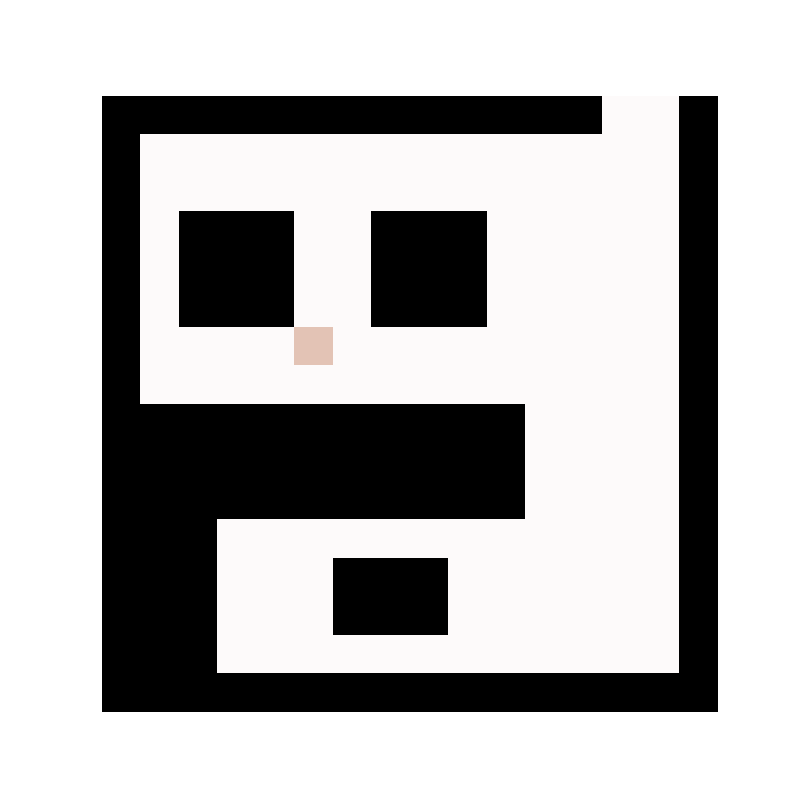

In [25]:
%matplotlib nbagg
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.animation as animation

M= get_layout()
#path_array = [13, 29, 30, 46, 62, 61, 77, 76, 60, 59, 75, 74, 90, 106, 107, 108, 109, 93, 92, 91, 92, 76, 77, 78, 94, 110, 126, 125, 124, 140, 139, 155, 171, 187, 188, 204, 205, 206, 222, 238, 237, 221, 220, 219, 203, 202, 186, 185, 184, 183, 182, 181, 180, 179, 195, 196, 197, 213, 212, 228, 227, 211, 212, 213, 229, 230, 231, 232, 233, 217, 201, 217, 218, 234, 235, 236, 235, 219, 203, 204, 203, 187, 188, 172, 156, 157, 173, 174, 190, 189, 188, 172, 173, 174, 158, 142, 141, 125, 141, 140, 139, 123, 122, 121, 105, 104, 103, 102, 118, 117, 116, 100, 101, 85, 86, 70, 69, 53, 54, 38, 22, 21, 37, 36, 35, 19, 20, 36, 35, 34, 33, 49, 65, 81, 97, 98, 114, 113, 97, 81, 97, 81, 97, 98, 99, 115, 99, 115, 99, 115, 99, 100, 101, 102, 101, 117, 116, 117, 101, 117, 118, 119, 120, 121, 122, 106, 90, 106, 90, 74, 58, 42, 43, 27, 26, 25, 41, 40, 24, 23, 39, 23, 24, 23, 39, 38, 39, 40, 41, 42, 26, 27, 28, 44, 45, 46, 30, 14]


# Set up formatting for the movie files
Writer = animation.writers['ffmpeg']
writer = Writer(fps=4, metadata=dict(artist='Me'), bitrate=18000)


def get_solution_array():
    #N=M.copy()
    k=0
    st=path_array[k]
    for i in range(len(M)):
        for j in range(len(M[i])):
            if st in path_array and st==A[i][j]:
                M[i][j]=M[i][j]+10
    del path_array[0]
    return M

def update(data):
    mat.set_data(data)
    return mat 

def data_gen():
    while len(path_array)>0:
        yield get_solution_array()

fig, ax = plt.subplots(figsize=(8, 8))
k=0
#path_array = [3, 9, 8, 7, 13, 19, 20, 26, 27, 21, 22, 28, 22, 16, 10, 4]
mat = ax.matshow(get_solution_array(), cmap='gist_earth')
#plt.colorbar(mat)
ani = animation.FuncAnimation(fig, update, data_gen, interval=1000,
                              save_count=5000)
plt.axis('off')
plt.show()

ani.save('animation_layout_large_250.mp4',  writer=writer)
#ani.save('animation.mp4')
#convert *.png animation.gif